In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import normalize
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.cluster import SpectralClustering, AffinityPropagation, KMeans
from sklearn import metrics
from itertools import cycle
import random
sns.set_style('darkgrid')
plt.rcParams['image.cmap'] = 'autumn'

In [2]:
df = pd.read_csv('results13.csv')

In [3]:
df.iloc[:, 12:].head()

,pace,state,30k,5k,genderdiv,20k,35k,city,40k
0,3.47,ON,62.07,8.90,9,38.80,74.73,Toronto,85.55
1,5.07,NaN,92.97,15.90,5,61.52,108.78,Kenya,124.77
2,4.98,NaN,92.72,15.93,1,61.53,108.68,Ambo,123.78
3,3.38,NaN,61.35,8.98,5,39.88,73.00,Hamilton,83.43
4,3.33,NaN,59.92,8.92,3,38.55,71.68,Iizuka,81.88


In [4]:
df.iloc[:, :12].head()

,25k,age,name,division,10k,gender,half,official,bib,ctz,country,overall
0,49.87,28,"Cassidy, Josh R.",9,18.18,M,40.93,90.90,W1,NaN,CAN,9
1,77.27,30,"Korir, Wesley",5,30.90,M,64.90,132.50,1,NaN,KEN,5
2,77.23,23,"Desisa, Lelisa",1,30.90,M,64.92,130.37,2,NaN,ETH,1
3,50.50,32,"Fearnley, Kurt H.",5,18.73,M,42.00,88.43,W2,NaN,AUS,5
4,48.75,39,"Hokinoue, Kota",3,18.18,M,40.57,87.22,W3,NaN,JPN,3


In [5]:
df.columns

Index(['25k', 'age', 'name', 'division', '10k', 'gender', 'half', 'official',
       'bib', 'ctz', 'country', 'overall', 'pace', 'state', '30k', '5k',
       'genderdiv', '20k', '35k', 'city', '40k'],
      dtype='object')

In [6]:
data = pd.DataFrame()

def get_float(strng):
    """Handles exceptions when string is not numeric. Returns
    floating point value.
    """
    try:
        result = float(strng)
    except:
        result = 0.0
    return result
        
data['5k'] = df['5k'].apply(get_float)
data['10k'] = df['10k'].apply(get_float)
data['20k'] = df['20k'].apply(get_float)
data['half'] = df['half'].apply(get_float)
data['25k'] = df['25k'].apply(get_float)
data['35k'] = df['35k'].apply(get_float)
data['40k'] = df['40k'].apply(get_float)
data['finish'] = df['official'].apply(get_float)
data['pace'] = df.pace
data['age'] = df.age

data['male'] = np.where(df.gender == 'M', 1, 0)

def get_wheelchair(strng):
    """Takes a bib number in string format. Returns 1 when
    starts with "W" (wheelchair), otherwise 0.
    """
    if strng[0] == 'W':
        return 1
    else:
        return 0
    
data['wheelchair'] = df.bib.apply(get_wheelchair)

for ft in data.columns:
    data[ft] = data[ft].apply(normalize)

In [7]:
clstr = KMeans(n_clusters=4, random_state=42)
clstr = clstr.fit(data)

In [8]:
df['cluster'] = clstr.predict(data)
#run = df[data.wheelchair == 0]

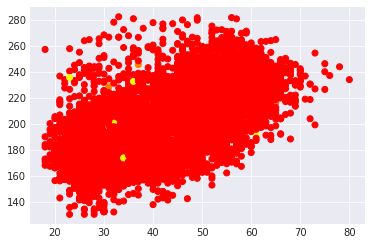

In [9]:
run = df[(data.wheelchair == 0) & (data.male == 1)]
plt.scatter(run.age, run.official, c=run.cluster);
plt.show();

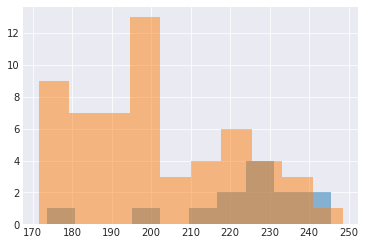

In [14]:
#plt.hist(df[df.cluster==0].official, alpha=.5);
#plt.hist(df[df.cluster==1].official, alpha=.5);
plt.hist(df[df.cluster==2].official, alpha=.5);
plt.hist(df[df.cluster==3].official, alpha=.5);
plt.show();